Exercises: Introduction to NLP in Python
===

![](http://static1.squarespace.com/static/538cea80e4b00f1fad490c1b/54668a77e4b00fb778d22a34/54668d8ae4b00fb778d2859c/1416007413413/NLTK.png)

In [39]:
reset -fs

In [40]:
import nltk

In [41]:
nltk?

---
What is NLTK?
---

Natural Language Toolkit (nltk) is a Python package for NLP

__Pros__:

- Common
- Functionality

__Cons__:

- Too academic
- Too slow
- Awkward API

We'll be using alot NLTK (but also other more modern libraries).

---
What are Corpus / Corpora?
---

> a collection of written texts, especially the entire works of a particular author or a body of writing on a particular subject.

The rest of the world call them "documents".

I have curated corpora for you. 

---
0) Download `nltk` corpora
---
![](images/download_all_the_corpora.png)
You have most of the `nltk` from environment setup. You will need all of the toolbox, including the corpora

In [42]:
# nltk.download('all')

----

In [43]:
# Double check that you have the corpora
from nltk.corpus import genesis

assert genesis.words()[:5] == ['In', 'the', 'beginning', 'God', 'created']

---
1) Zipf's Law:
---

Zipf's Law (not a real "law") is a NLP phenomena:

>  the frequency of any word is inversely proportional to its rank in the frequency table. 

or in Plain English:

> the most frequent word will occur about twice as often as the second most frequent word

For example:

|Word  |  Rank | Frequency |  
|:-------:|:------:| :---:|
| “the”   | 1st |30k |
| "of" | 2nd | 15k |  
| "and" |  3rd | 7.5k |  
 
__Word by frequency count:__
![](images/graph-zipf.png)

NLP (or Data Science) WorkFlow
------

1. Ask
2. Acquire
3. Process
4. Model
5. Deliver 

TODO: Load a nltk corpus

In [44]:
from nltk.corpus import gutenberg
gutenberg.words()[:5]

['[', 'Emma', 'by', 'Jane', 'Austen']

TODO: Get word counts as a dict

In [45]:
from collections import Counter

word_counts = Counter(gutenberg.words())
# word_counts

Sort word counts (done for you)

In [46]:
import operator

In [47]:
word_counts_sorted = sorted(word_counts.items(), 
                            key=operator.itemgetter(1),
                            reverse=True)

word_counts_sorted

[(',', 186091),
 ('the', 125748),
 ('and', 78846),
 ('.', 73746),
 ('of', 70078),
 (':', 47406),
 ('to', 46443),
 ('a', 32504),
 ('in', 31959),
 ('I', 30221),
 (';', 27329),
 ('that', 27289),
 ('he', 22198),
 ('his', 20585),
 ("'", 19873),
 ('it', 19734),
 ('was', 18558),
 ('for', 16860),
 ('not', 16834),
 ('with', 16827),
 ('And', 16533),
 ('is', 15944),
 ('be', 15844),
 ('"', 15422),
 ('you', 14648),
 ('as', 13335),
 ('all', 12965),
 ('him', 12924),
 ('they', 11536),
 ('shall', 11456),
 ('her', 11153),
 ('them', 10218),
 ('had', 10177),
 ('have', 9900),
 ('s', 9792),
 ('my', 9580),
 ('said', 9410),
 ('me', 9376),
 ('but', 9252),
 ('unto', 8953),
 ('-', 8850),
 ('from', 8647),
 ('at', 8642),
 ('which', 8435),
 ('on', 8194),
 ('by', 8012),
 ('this', 7706),
 ('The', 7542),
 ('their', 7516),
 ('she', 7434),
 ('?', 7342),
 ('will', 7130),
 ('were', 6814),
 ('LORD', 6657),
 ('are', 6642),
 ('so', 6338),
 ('thou', 5928),
 ('or', 5901),
 ('one', 5755),
 ('."', 5751),
 ('!', 5730),
 ('out', 5

In [48]:
assert word_counts_sorted[1] == ('the', 125748)

TODO: What is the data structure of word_counts_sorted?

list of tuples

Take only the first couple to plot

In [49]:
sample = word_counts_sorted[:15]
dict(sample)

{"'": 19873,
 ',': 186091,
 '.': 73746,
 ':': 47406,
 ';': 27329,
 'I': 30221,
 'a': 32504,
 'and': 78846,
 'he': 22198,
 'his': 20585,
 'in': 31959,
 'of': 70078,
 'that': 27289,
 'the': 125748,
 'to': 46443}

Plot frequency counts

In [50]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [51]:
# TODO: Finish code. Think about efficent code

In [52]:
# unpack and zip
labels, values = zip(*sample) # TODO: Unpack sample. Think about efficent code

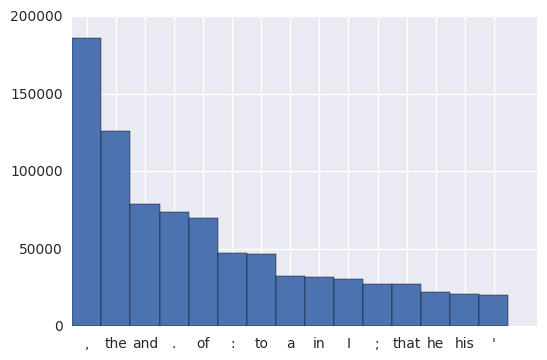

In [53]:
indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

TODO: Does this confirm to Zipf Law? Why or Why not?

yes, the frequency of a word is inversely proportional to its rank.

----
Challenge Exercises
-----

TODO: Remove punctuation and plot the results

In [54]:
from string import punctuation
# punctuation

labels = list(labels)

# labels = [x for x in punctuation if x not in punctuation]


for x in labels:
    if x in punctuation:
        labels.remove(x)
        
labels

['the', 'and', 'of', 'to', 'a', 'in', 'I', 'that', 'he', 'his']

TODO: Plot word frequency against word rank.

<details><summary>
Click here for a hint...
</summary>
Plot it on log/log scale
</details>

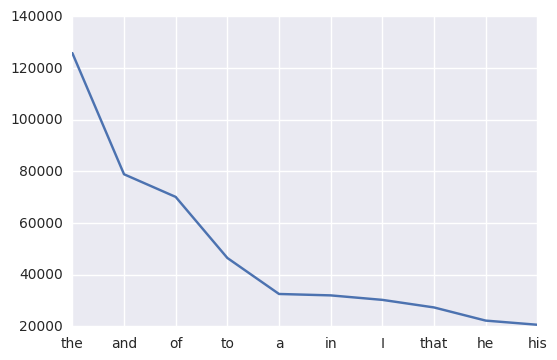

In [55]:
sample = dict(sample)

sample_counts = [sample[x] for x in labels]
sample_counts

plt.plot(list(range(len(labels))), sample_counts);
indexes = np.arange(len(labels))
width = 0
plt.xticks(indexes + width * 0.5, labels);

TODO: Describe the what the plot tells you about the data

the plot tells us the frequency of each word appearing.

TODO: How does your result compare to Wikipedia?
    
![](https://upload.wikimedia.org/wikipedia/commons/b/b9/Wikipedia-n-zipf.png)

they are both decreasing, but our sample looks more logarithmic than linear.

TODO: Fit and plot a linear model to the data

In [56]:
%pylab inline

import pandas as pd
import seaborn as sns
import statsmodels.api as sm

Populating the interactive namespace from numpy and matplotlib


/Users/justin/anaconda/envs/nlp/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


TODO: Is a linear model a good model for the data? Why or Why not?

In [ ]:
# fit linear model
coeffs = np.polyfit(np.lpg(ranks), np.log(frequency), deg=1)
poly = np.poly1d(coeffs)

yfit = 

Summary
-----

1. Ask the right question
2. Acquire the data
3. Process: clean and organize
4. Model: statistics and machine learning
5. Deliver: add value, report, presentation, or code/API

<br>
<br> 
<br>

----